In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("updated_disneylandreviews.csv")
# Handle missing values (if necessary, fill with a value like mean or mode)
df.fillna({'Rating': df['Rating'].mean(), 'Sentiment': df['Sentiment'].mean()}, inplace=True)

# Encode categorical variables like "Reviewer_Location" and "Branch"
df = df.drop(columns=['Review_ID', 'Review_Text', 'Branch'])  # Remove unnecessary columns

df.head()

,Rating,Reviewer_Location,Year,Month,Sentiment
0,4,Australia,2019,4,0.7069
1,4,Philippines,2019,5,0.9901
2,4,United Arab Emirates,2019,4,0.9920
3,4,Australia,2019,4,0.8489
4,4,United Kingdom,2019,4,0.2846


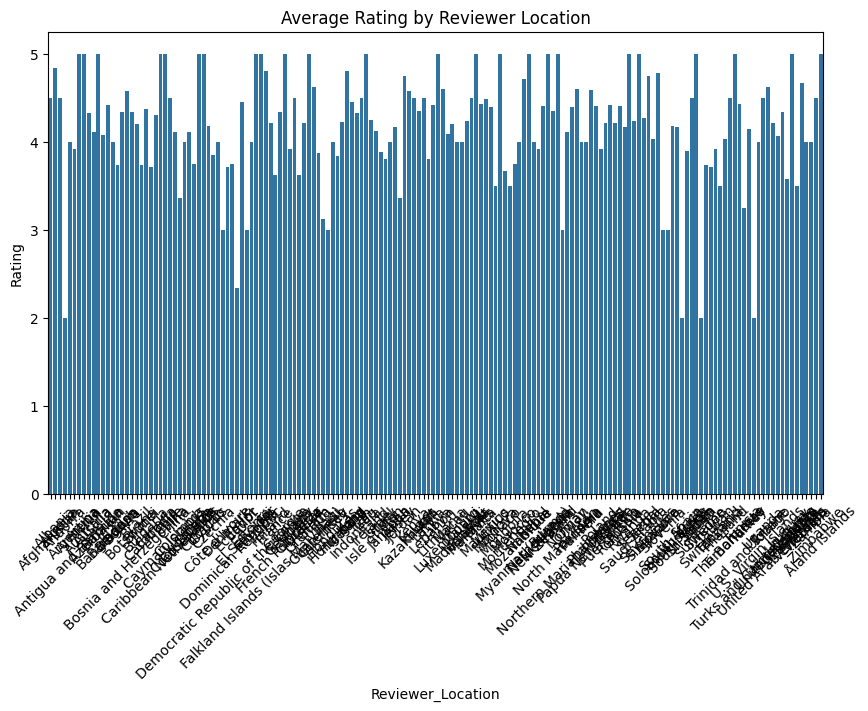

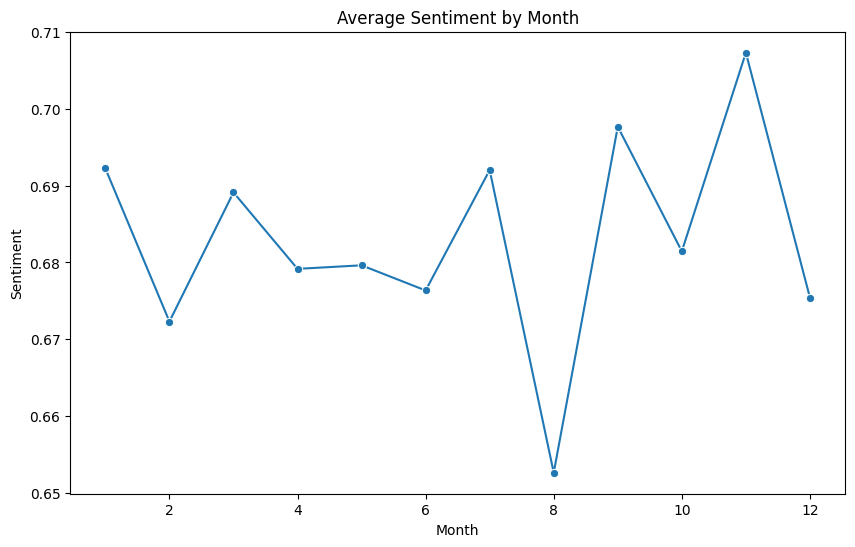

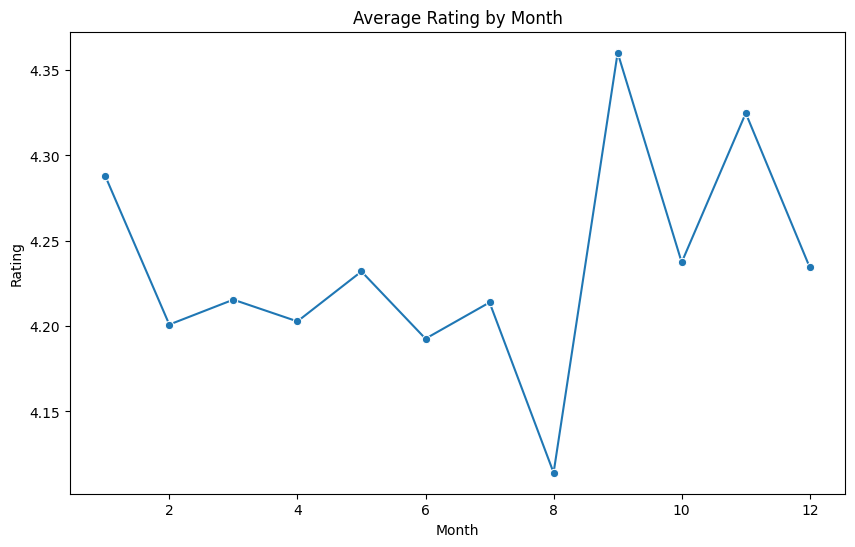

In [6]:
rating_by_location = df.groupby('Reviewer_Location').agg({'Rating': 'mean', 'Sentiment': 'mean'}).reset_index()

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Reviewer_Location', y='Rating', data=rating_by_location)
plt.title('Average Rating by Reviewer Location')
plt.xticks(rotation=45)
plt.show()

sentiment_by_month = df.groupby('Month').agg({'Sentiment': 'mean'}).reset_index()

# Plot the sentiment trends by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sentiment', data=sentiment_by_month, marker='o')
plt.title('Average Sentiment by Month')
plt.show()

rating_by_month = df.groupby('Month').agg({'Rating': 'mean'}).reset_index()

# Plot the sentiment trends by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Rating', data=rating_by_month, marker='o')
plt.title('Average Rating by Month')
plt.show()

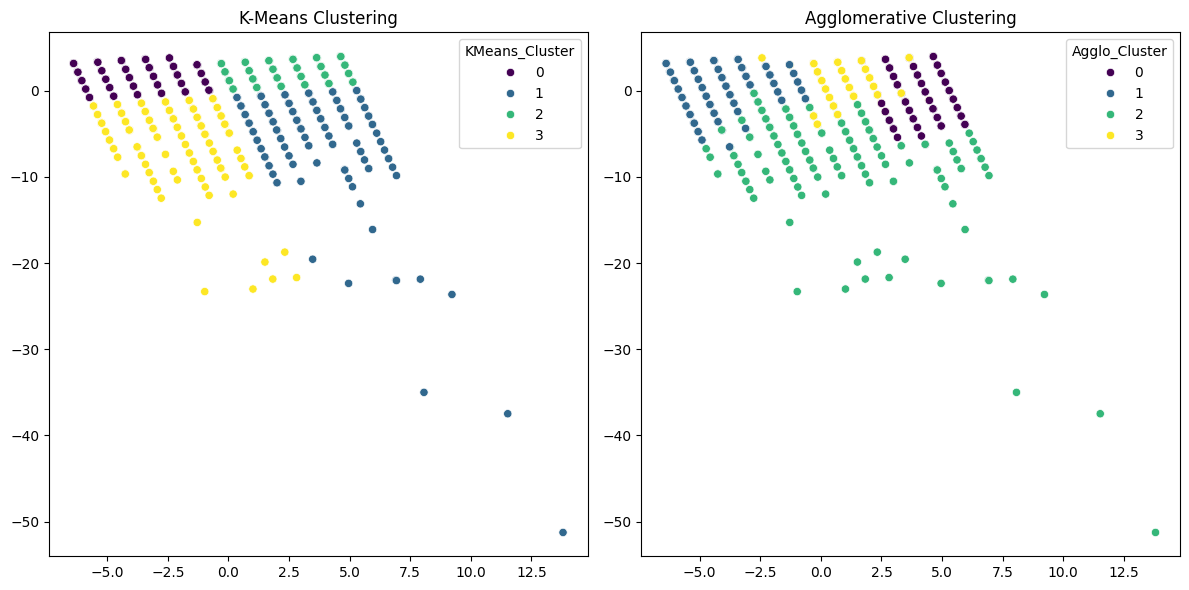

KMeans Cluster Distribution:
KMeans_Cluster
0    11802
2    11754
1     9741
3     6870
Name: count, dtype: int64

Agglomerative Clustering Cluster Distribution:
Agglo_Cluster
1    12744
0    10861
3    10231
2     6331
Name: count, dtype: int64


,Rating,Reviewer_Location,Year,Month,Sentiment,Reviewer_Location_Encoded,KMeans_Cluster,Agglo_Cluster
0,-0.218373,Australia,2019,4,0.051862,8,0,1
1,-0.218373,Philippines,2019,5,0.640789,114,0,3
2,-0.218373,United Arab Emirates,2019,4,0.644741,151,0,1
3,-0.218373,Australia,2019,4,0.347158,8,0,1
4,-0.218373,United Kingdom,2019,4,-0.826330,152,0,1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

# Data Preprocessing: Encoding 'Reviewer_Location' and normalizing relevant columns
df['Reviewer_Location_Encoded'] = LabelEncoder().fit_transform(df['Reviewer_Location'])

# Normalize continuous features: 'Rating', 'Sentiment'
scaler = StandardScaler()
df[['Rating', 'Sentiment']] = scaler.fit_transform(df[['Rating', 'Sentiment']])

# Clustering using K-Means based on Year, Month, Rating, and Sentiment
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df[['Year', 'Month', 'Rating', 'Sentiment']])

# Clustering using Agglomerative Clustering based on Year, Month, Rating, and Sentiment
agglo = AgglomerativeClustering(n_clusters=4)
df['Agglo_Cluster'] = agglo.fit_predict(df[['Year', 'Month', 'Rating', 'Sentiment']])

# Visualizing clusters with PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['Year', 'Month', 'Rating', 'Sentiment']])

# Plotting the K-Means clustering result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')

# Plotting the Agglomerative Clustering result
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Agglo_Cluster'], palette='viridis')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

print("KMeans Cluster Distribution:")
print(df['KMeans_Cluster'].value_counts())
print("\nAgglomerative Clustering Cluster Distribution:")
print(df['Agglo_Cluster'].value_counts())

df.head()

C:\Users\angsp\AppData\Local\Temp\ipykernel_11860\3552790640.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df, palette="Set3")
C:\Users\angsp\AppData\Local\Temp\ipykernel_11860\3552790640.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df, palette="Set3")


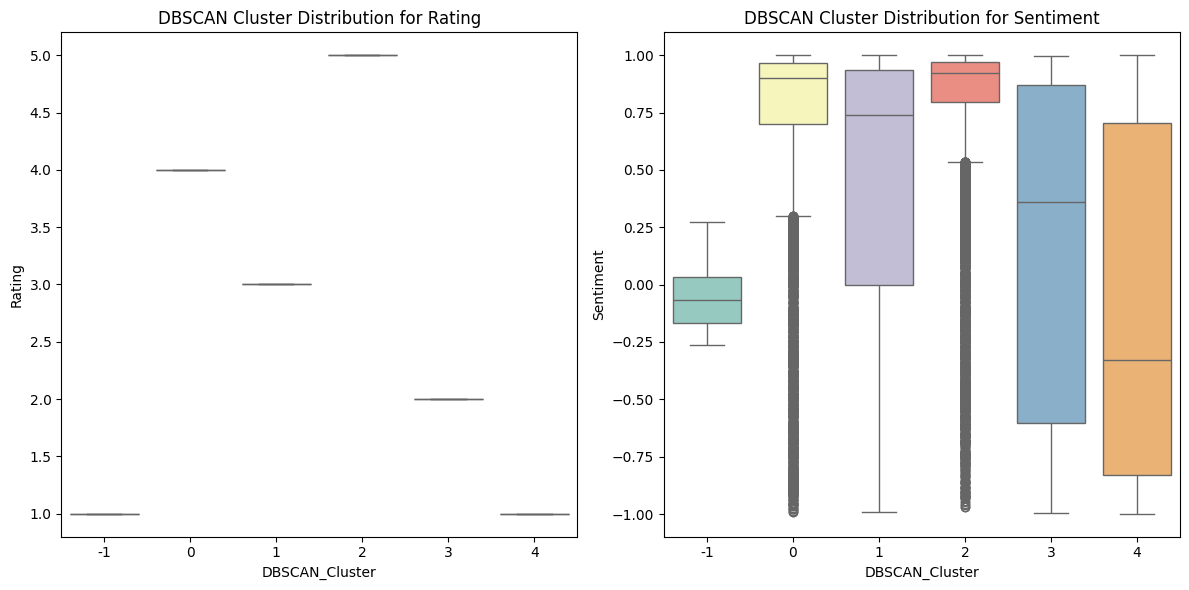

DBSCAN Cluster Descriptive Statistics:

                 Rating                                    Sentiment  \
                  count mean  std  min  25%  50%  75%  max     count   
DBSCAN_Cluster                                                         
-1                 35.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      35.0   
 0              10104.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0   10104.0   
 1               4799.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0    4799.0   
 2              21972.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0   21972.0   
 3               1942.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0    1942.0   
 4               1315.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    1315.0   

                          ...                      Month                      \
                    mean  ...       75%     max    count      mean       std   
DBSCAN_Cluster            ...                                                  
-1             -0.051549  ...  0.035200  0.2732     35.0  6.142857  5.0

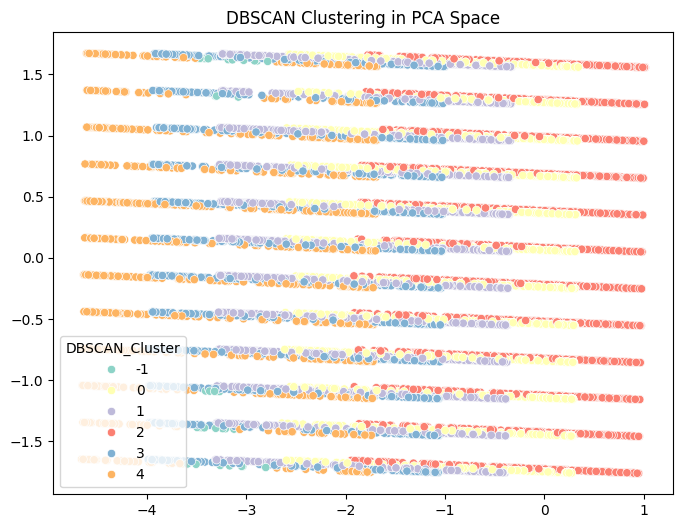

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df = pd.read_csv("updated_disneylandreviews.csv")
df.fillna({'Rating': df['Rating'].mean(), 'Sentiment': df['Sentiment'].mean()}, inplace=True)
df = df.drop(columns=['Review_ID', 'Review_Text', 'Branch'])

df_subset = df[['Rating', 'Sentiment', 'Month']]
scaler = StandardScaler()
df_subset_scaled = scaler.fit_transform(df_subset)

dbscan = DBSCAN(eps=0.6, min_samples=50)  # Adjust eps and min_samples to control cluster size
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_subset_scaled)
plt.figure(figsize=(12, 6))

# Rating distribution by DBSCAN cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Rating')

# Sentiment distribution by DBSCAN cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Sentiment')

plt.tight_layout()
plt.show()

dbscan_stats = df.groupby('DBSCAN_Cluster')[['Rating', 'Sentiment', 'Month']].describe()

print("DBSCAN Cluster Descriptive Statistics:\n")
print(dbscan_stats)

# Visualizing DBSCAN clusters in PCA space
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_subset_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['DBSCAN_Cluster'], palette='Set3')
plt.title('DBSCAN Clustering in PCA Space')
plt.show()

Cluster 0 (Highly Satisfied Customers):
Rating: 4 (very satisfied).
Sentiment: Strong positive sentiment (0.75 to 0.95).
Possible Action: Focus on maintaining loyalty by offering exclusive deals, loyalty programs, and encouraging referrals.

Cluster 1 (Moderately Satisfied Customers):
Rating: 3 (neutral satisfaction).
Sentiment: Neutral to positive sentiment (0 to 0.9).
Possible Action: Engage these customers through feedback surveys, personalized offers, and targeted re-engagement strategies to convert them into more satisfied customers.
Cluster 2 (Dissatisfied Customers):

Rating: 1 (very dissatisfied).
Sentiment: Neutral or slightly negative sentiment (0.8 to 0.9).
Possible Actiont: Address key issues immediately through customer support, offer solutions like compensation, and work on improving pain points that led to dissatisfaction.

Cluster 3 (Mixed Sentiment Customers):
Rating: 3 (mixed satisfaction).
Sentiment: Mixed sentiment with significant variability (-0.6 to 0.8).
Possible Action: Investigate the specific causes of mixed sentiment, segment further based on specific issues, and offer tailored solutions or incentives to improve satisfaction.

Cluster 4 (Very Dissatisfied or Critical Customers):
Rating: 1 (very dissatisfied).
Sentiment: Strong negative sentiment (-0.8 to 0.7).
Possible Action: Prioritize these customers for resolution, provide immediate support, offer compensation or refunds, and use their feedback to improve the service/product.

General Observations & Recommendations:
Customer Experience Management: It’s crucial to focus on segments with a Rating of 1 and those with mixed to neutral sentiment, as these customers may become advocates or detractors based on how you handle their issues.
Retention & Feedback Loops: For clusters that show neutral or mixed sentiment (Clusters 1, 2, and 3), providing avenues for further engagement and offering personalized feedback loops could turn them into more loyal customers.
Focus on Pain Points: Especially for the dissatisfied clusters (Cluster 4 and some in Cluster 3), it’s critical to identify pain points from their reviews and act quickly on resolving them.
Loyalty and Incentives: For the satisfied clusters (Clusters 0 and 2), providing loyalty programs, targeted promotions, or early access to new features/products can solidify their relationship with the brand.